In [1]:
# CELL 1: SETUP AND IMPORTS
# Importing required libraries and loading the cleaned dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("WORLD HAPPINESS REPORT - CORRELATION ANALYSIS")

# Loading the cleaned dataset
print("\nLoading cleaned dataset...")
df = pd.read_csv('../data/processed/happiness_cleaned.csv')
print(f"Cleaned dataset loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")

# Display basic info
print(f"\nDataset Overview:")
print(f"Countries: {df['Country'].nunique()}")
print(f"Years: {df['Year'].min()}-{df['Year'].max()}")
print(f"Regions: {df['Regional indicator'].nunique()}")

WORLD HAPPINESS REPORT - CORRELATION ANALYSIS

Loading cleaned dataset...
Cleaned dataset loaded: 1,502 rows × 17 columns

Dataset Overview:
Countries: 175
Years: 2015-2024
Regions: 10


In [2]:
# CELL 2: PREPARING CORRELATION VARIABLES
# Selecting and preparing variables for correlation analysis

print("\nPREPARING CORRELATION VARIABLES")

# Defining the main happiness factors for analysis
happiness_factors = [
    'Happiness score',
    'GDP per capita', 
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

# Verifying all columns exist
available_factors = [col for col in happiness_factors if col in df.columns]
missing_factors = [col for col in happiness_factors if col not in df.columns]

print(f"Available factors for analysis: {len(available_factors)}")
for factor in available_factors:
    print(f"  • {factor}")

if missing_factors:
    print(f"\nMissing factors: {missing_factors}")

# Creating correlation dataset
corr_df = df[available_factors].copy()
print(f"\nCorrelation dataset shape: {corr_df.shape}")

# Checking for any remaining missing values
missing_check = corr_df.isnull().sum()
print(f"\nMissing values check:")
for col, missing in missing_check.items():
    if missing > 0:
        print(f"{col}: {missing} missing")
    else:
        print(f"{col}: Complete")

# Basic statistics for correlation variables
print(f"\nDescriptive Statistics:")
print(corr_df.describe().round(3))



PREPARING CORRELATION VARIABLES
Available factors for analysis: 7
  • Happiness score
  • GDP per capita
  • Social support
  • Healthy life expectancy
  • Freedom to make life choices
  • Generosity
  • Perceptions of corruption

Correlation dataset shape: (1502, 7)

Missing values check:
Happiness score: Complete
GDP per capita: Complete
Social support: Complete
Healthy life expectancy: Complete
Freedom to make life choices: Complete
Generosity: Complete
Perceptions of corruption: Complete

Descriptive Statistics:
       Happiness score  GDP per capita  Social support  \
count         1502.000        1502.000        1502.000   
mean             5.449           6.107           0.692   
std              1.126           2.500           0.213   
min              1.721           0.000           0.000   
25%              4.593           4.376           0.565   
50%              5.470           6.306           0.738   
75%              6.278           8.048           0.862   
max          

In [3]:
# CELL 3: CORRELATION MATRIX CALCULATION
# Calculating different types of correlations

print("\nCALCULATING CORRELATION MATRICES")

# 1. Pearson Correlation (linear relationships)
print("Calculating Pearson correlations...")
pearson_corr = corr_df.corr(method='pearson')
print("Pearson correlation matrix calculated")

# 2. Spearman Correlation (rank-based, handles non-linear relationships)
print("\nCalculating Spearman correlations...")
spearman_corr = corr_df.corr(method='spearman')
print("Spearman correlation matrix calculated")

# 3. Kendall Correlation (another rank-based method)
print("\nCalculating Kendall correlations...")
kendall_corr = corr_df.corr(method='kendall')
print("Kendall correlation matrix calculated")

# Displaying correlation with happiness score 
print(f"\nCORRELATIONS WITH HAPPINESS SCORE:")

happiness_correlations = pd.DataFrame({
    'Factor': pearson_corr.index[1:],  # Exclude happiness score itself
    'Pearson': pearson_corr['Happiness score'][1:].values,
    'Spearman': spearman_corr['Happiness score'][1:].values,
    'Kendall': kendall_corr['Happiness score'][1:].values
}).sort_values('Pearson', ascending=False)

print("Factors ranked by Pearson correlation with Happiness Score:")
for _, row in happiness_correlations.iterrows():
    print(f"  {row['Factor']:<30} | P: {row['Pearson']:6.3f} | S: {row['Spearman']:6.3f} | K: {row['Kendall']:6.3f}")


CALCULATING CORRELATION MATRICES
Calculating Pearson correlations...
Pearson correlation matrix calculated

Calculating Spearman correlations...
Spearman correlation matrix calculated

Calculating Kendall correlations...
Kendall correlation matrix calculated

CORRELATIONS WITH HAPPINESS SCORE:
Factors ranked by Pearson correlation with Happiness Score:
  Social support                 | P:  0.744 | S:  0.772 | K:  0.570
  Healthy life expectancy        | P:  0.660 | S:  0.684 | K:  0.494
  GDP per capita                 | P:  0.631 | S:  0.647 | K:  0.486
  Freedom to make life choices   | P:  0.591 | S:  0.597 | K:  0.427
  Generosity                     | P:  0.106 | S:  0.109 | K:  0.071
  Perceptions of corruption      | P:  0.072 | S:  0.074 | K:  0.048



CREATING CORRELATION HEATMAPS


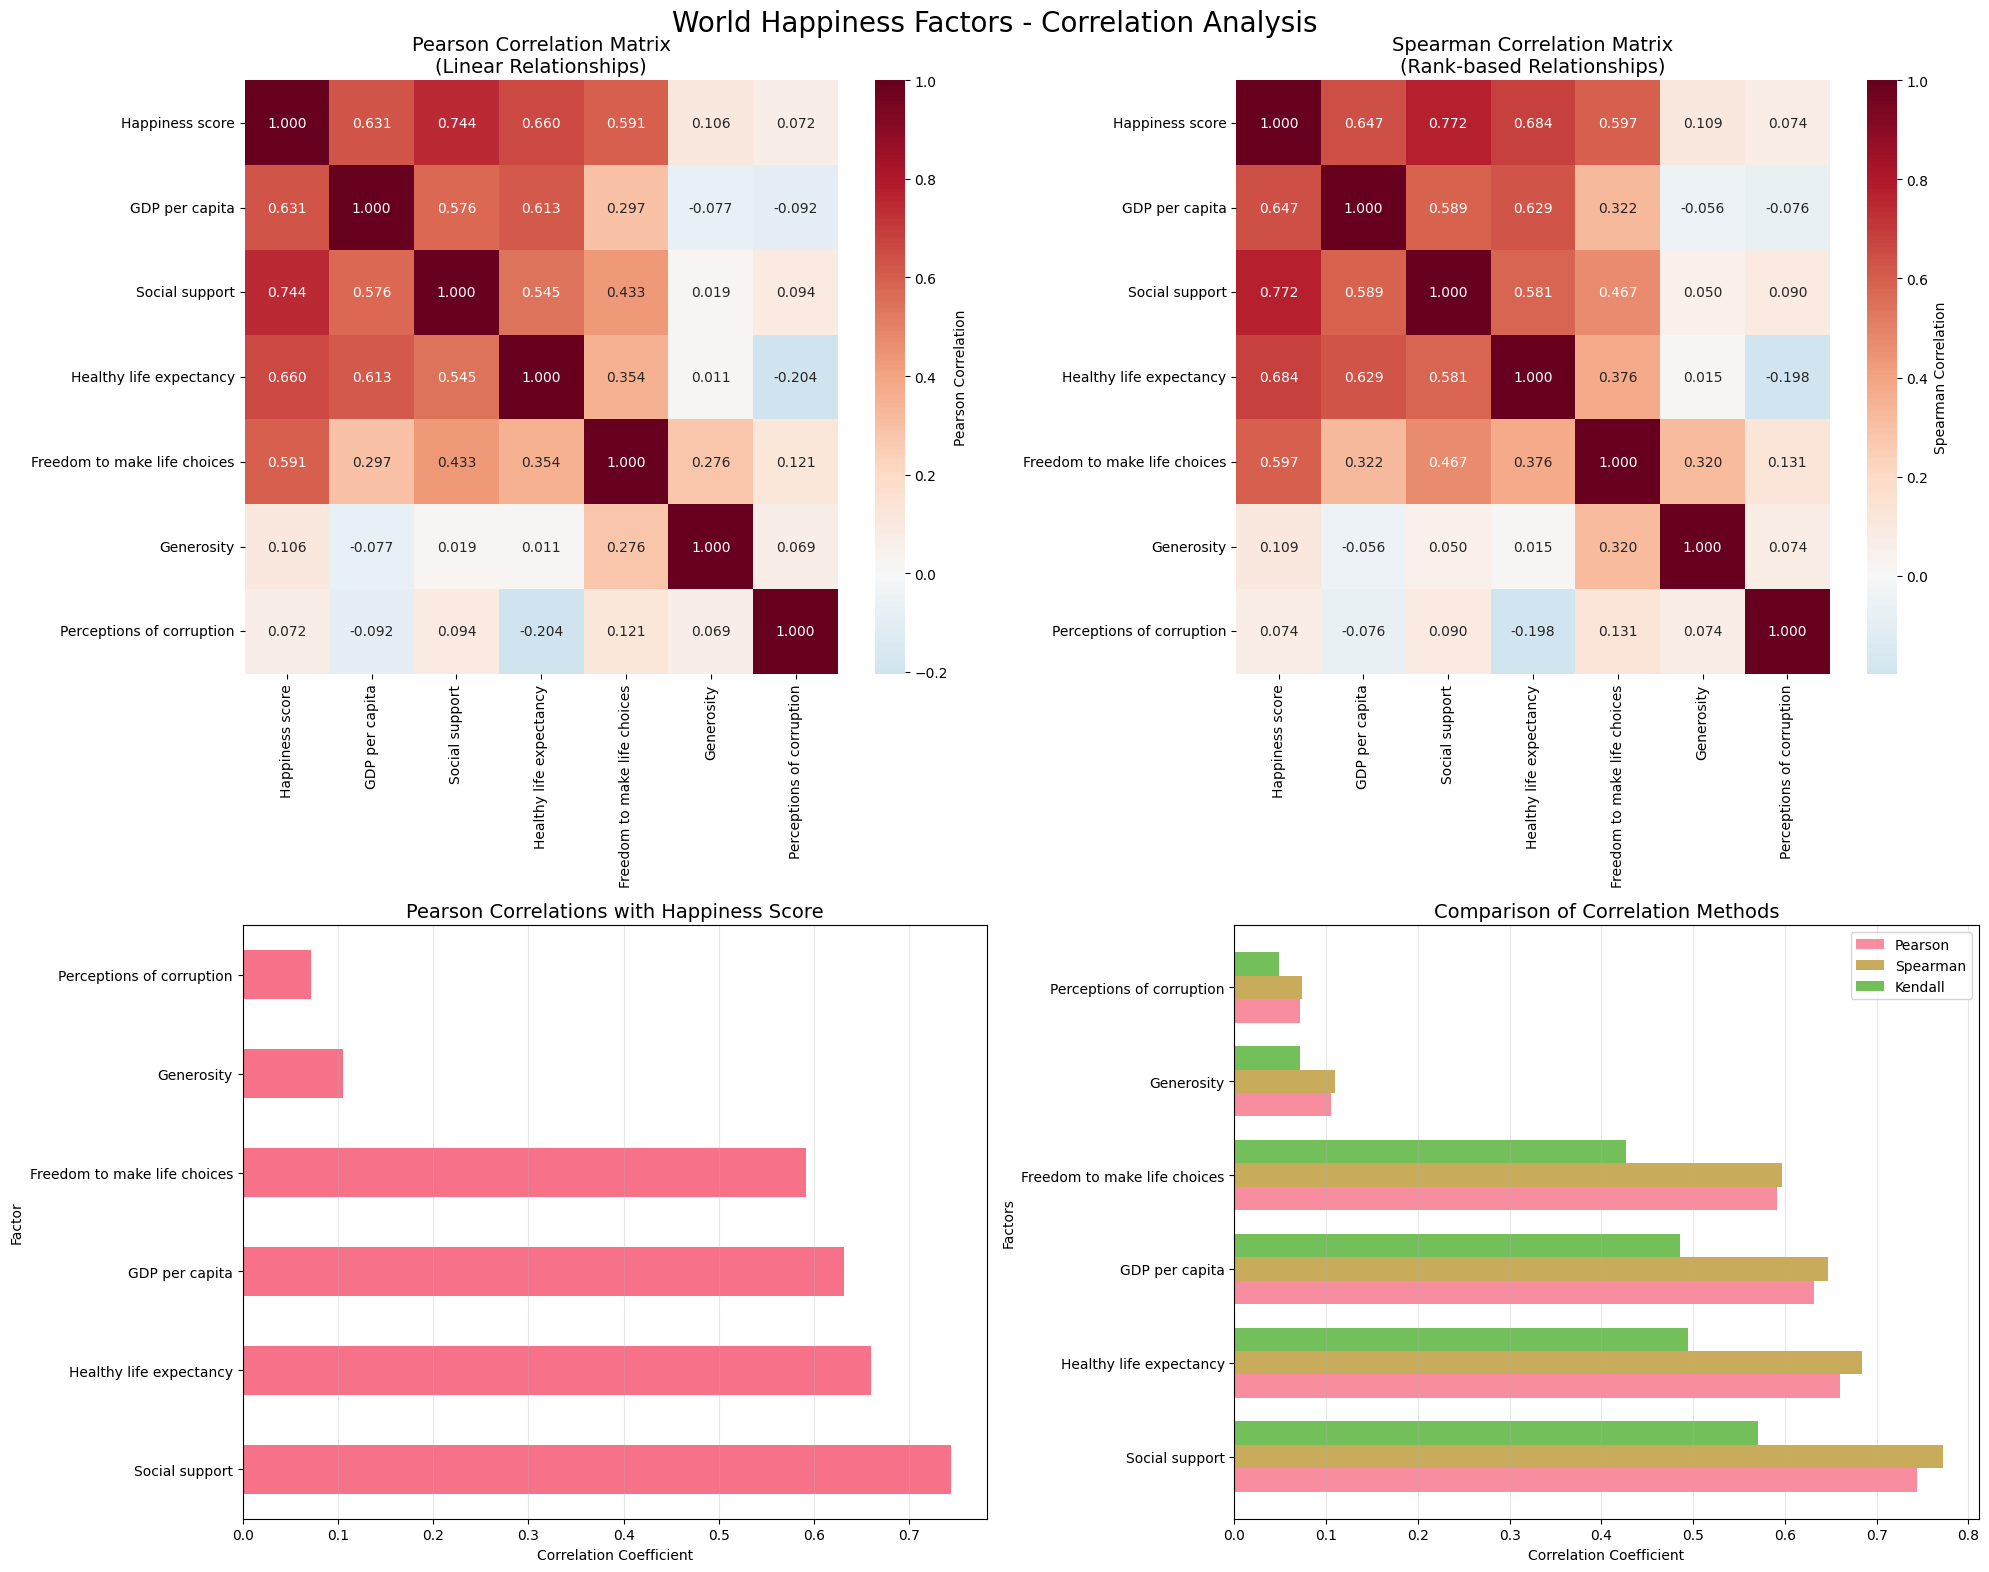

Correlation heatmaps created and saved


In [4]:
# CELL 4: CORRELATION MATRIX HEATMAP
# Creating comprehensive correlation visualization
# =============================================================================

print("\nCREATING CORRELATION HEATMAPS")

# Creating figure with subplots for different correlation methods
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('World Happiness Factors - Correlation Analysis', fontsize=20, y=0.98)

# 1. Pearson Correlation Heatmap
sns.heatmap(pearson_corr, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'label': 'Pearson Correlation'},
            ax=axes[0,0])
axes[0,0].set_title('Pearson Correlation Matrix\n(Linear Relationships)', fontsize=14)
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('')

# 2. Spearman Correlation Heatmap
sns.heatmap(spearman_corr, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'label': 'Spearman Correlation'},
            ax=axes[0,1])
axes[0,1].set_title('Spearman Correlation Matrix\n(Rank-based Relationships)', fontsize=14)
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')

# 3. Correlation with Happiness Score Bar Plot
happiness_correlations.set_index('Factor')['Pearson'].plot(kind='barh', ax=axes[1,0])
axes[1,0].set_title('Pearson Correlations with Happiness Score', fontsize=14)
axes[1,0].set_xlabel('Correlation Coefficient')
axes[1,0].grid(axis='x', alpha=0.3)

# 4. Comparison of correlation methods
x = np.arange(len(happiness_correlations))
width = 0.25

axes[1,1].barh(x - width, happiness_correlations['Pearson'], width, label='Pearson', alpha=0.8)
axes[1,1].barh(x, happiness_correlations['Spearman'], width, label='Spearman', alpha=0.8)
axes[1,1].barh(x + width, happiness_correlations['Kendall'], width, label='Kendall', alpha=0.8)

axes[1,1].set_ylabel('Factors')
axes[1,1].set_xlabel('Correlation Coefficient')
axes[1,1].set_title('Comparison of Correlation Methods', fontsize=14)
axes[1,1].set_yticks(x)
axes[1,1].set_yticklabels(happiness_correlations['Factor'])
axes[1,1].legend()
axes[1,1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/figures/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Correlation heatmaps created and saved")

In [5]:
# CELL 5: STATISTICAL SIGNIFICANCE TESTING
# Testing statistical significance of correlations

print("\nSTATISTICAL SIGNIFICANCE TESTING")

print("Testing correlation significance with Happiness Score...")

significance_results = []

for factor in available_factors[1:]:  # Skipping happiness score itself
    # Calculating Pearson correlation with p-value
    corr_coef, p_value = pearsonr(df['Happiness score'], df[factor])
    
    # Determining significance level
    if p_value < 0.001:
        significance = "***"
        sig_level = "p < 0.001"
    elif p_value < 0.01:
        significance = "**"
        sig_level = "p < 0.01"
    elif p_value < 0.05:
        significance = "*"
        sig_level = "p < 0.05"
    else:
        significance = ""
        sig_level = f"p = {p_value:.3f}"
    
    significance_results.append({
        'Factor': factor,
        'Correlation': corr_coef,
        'P-value': p_value,
        'Significance': significance,
        'Sig_Level': sig_level
    })

# Creating significance table
sig_df = pd.DataFrame(significance_results).sort_values('Correlation', ascending=False)

print("CORRELATION SIGNIFICANCE RESULTS:")

print(f"{'Factor':<30} | {'Correlation':<12} | {'P-value':<12} | {'Significance'}")


for _, row in sig_df.iterrows():
    print(f"{row['Factor']:<30} | {row['Correlation']:>10.3f} | {row['P-value']:>10.3e} | {row['Sig_Level']} {row['Significance']}")

print("\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05")

# Counting significant correlations
significant_count = len(sig_df[sig_df['P-value'] < 0.05])
print(f"\n{significant_count} out of {len(sig_df)} correlations are statistically significant (p < 0.05)")


STATISTICAL SIGNIFICANCE TESTING
Testing correlation significance with Happiness Score...
CORRELATION SIGNIFICANCE RESULTS:
Factor                         | Correlation  | P-value      | Significance
Social support                 |      0.744 | 4.802e-265 | p < 0.001 ***
Healthy life expectancy        |      0.660 | 1.643e-188 | p < 0.001 ***
GDP per capita                 |      0.631 | 7.621e-168 | p < 0.001 ***
Freedom to make life choices   |      0.591 | 2.913e-142 | p < 0.001 ***
Generosity                     |      0.106 |  4.149e-05 | p < 0.001 ***
Perceptions of corruption      |      0.072 |  5.386e-03 | p < 0.01 **

Significance levels: *** p<0.001, ** p<0.01, * p<0.05

6 out of 6 correlations are statistically significant (p < 0.05)



CREATING SCATTER PLOTS FOR KEY RELATIONSHIPS
Creating scatter plots for strongest correlations:
  • Social support: r = 0.744
  • Healthy life expectancy: r = 0.660
  • GDP per capita: r = 0.631
  • Freedom to make life choices: r = 0.591


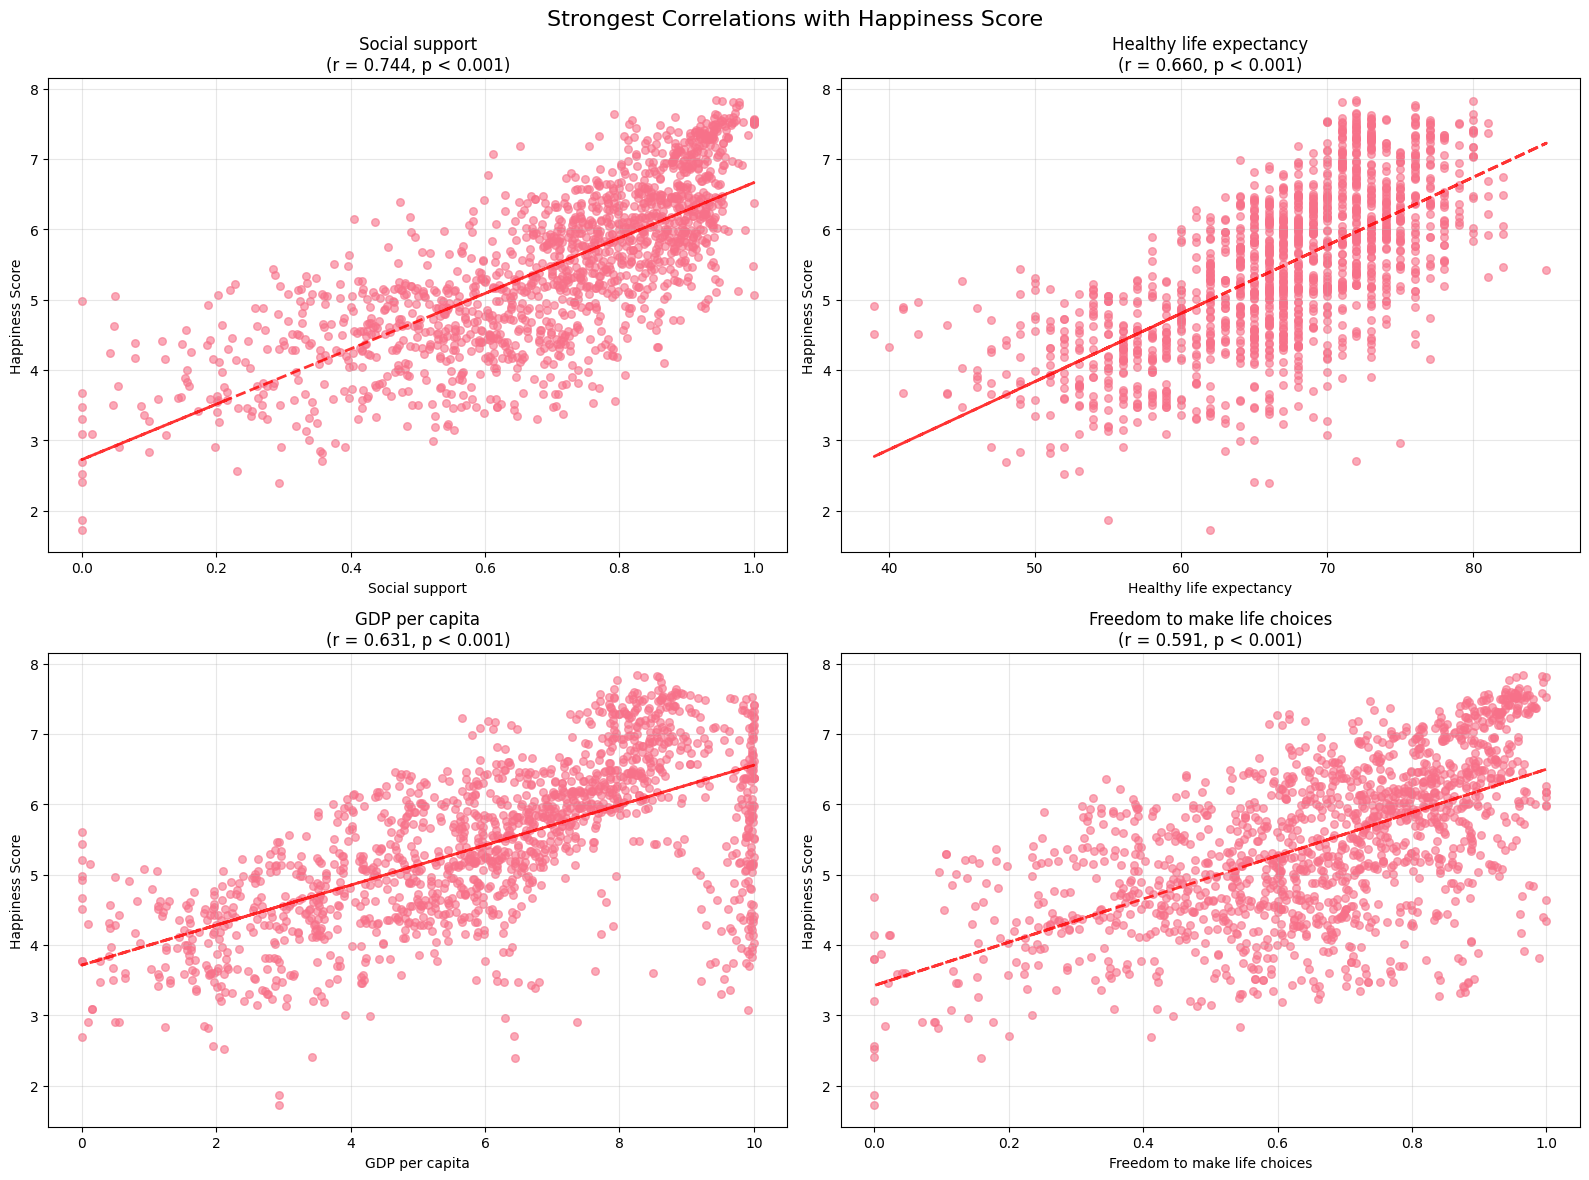

Scatter plots created and saved


In [6]:
# CELL 6: SCATTER PLOTS FOR KEY RELATIONSHIPS
# Visualizing the strongest correlations with scatter plots

print("\nCREATING SCATTER PLOTS FOR KEY RELATIONSHIPS")


# Selecting top 4 strongest correlations for detailed visualization
top_correlations = sig_df.head(4)
print("Creating scatter plots for strongest correlations:")
for _, row in top_correlations.iterrows():
    print(f"  • {row['Factor']}: r = {row['Correlation']:.3f}")

# Creating scatter plot figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Strongest Correlations with Happiness Score', fontsize=16, y=0.98)

axes = axes.flatten()

for i, (_, row) in enumerate(top_correlations.iterrows()):
    factor = row['Factor']
    correlation = row['Correlation']
    
    # Creating scatter plot
    axes[i].scatter(df[factor], df['Happiness score'], alpha=0.6, s=30)
    
    # Addding regression line
    z = np.polyfit(df[factor], df['Happiness score'], 1)
    p = np.poly1d(z)
    axes[i].plot(df[factor], p(df[factor]), "r--", alpha=0.8, linewidth=2)
    
    # Customized plot
    axes[i].set_xlabel(factor)
    axes[i].set_ylabel('Happiness Score')
    axes[i].set_title(f'{factor}\n(r = {correlation:.3f}, {row["Sig_Level"]})')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/figures/happiness_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Scatter plots created and saved")


REGIONAL CORRELATION ANALYSIS
Analyzing correlations within each region...

HAPPINESS SCORE CORRELATIONS BY REGION:
Region                    | GDP      | Social   | Health   | Freedom  | Trust   
Central and Eastern Euro  |  0.362 |  0.547 |  0.272 |  0.606 |  0.063
Commonwealth of Independ  |  0.204 |  0.565 |  0.024 |  0.610 |  0.105
East Asia                 |  0.556 |  0.394 |  0.433 | -0.276 |  0.030
Latin America and Caribb  |  0.417 |  0.495 |  0.423 |  0.653 |  0.010
Middle East and North Af  |  0.656 |  0.692 |  0.400 |  0.714 |  0.036
North America and ANZ     | -0.267 |  0.280 |  0.270 |  0.890 |  0.200
South Asia                |  0.179 |  0.603 |  0.294 |  0.550 | -0.025
Southeast Asia            |  0.571 |  0.698 |  0.616 | -0.007 |  0.010
Sub-Saharan Africa        |  0.198 |  0.361 |  0.237 |  0.241 |  0.074
Western Europe            |  0.193 |  0.640 |  0.321 |  0.787 |  0.279

Creating regional correlation comparison...


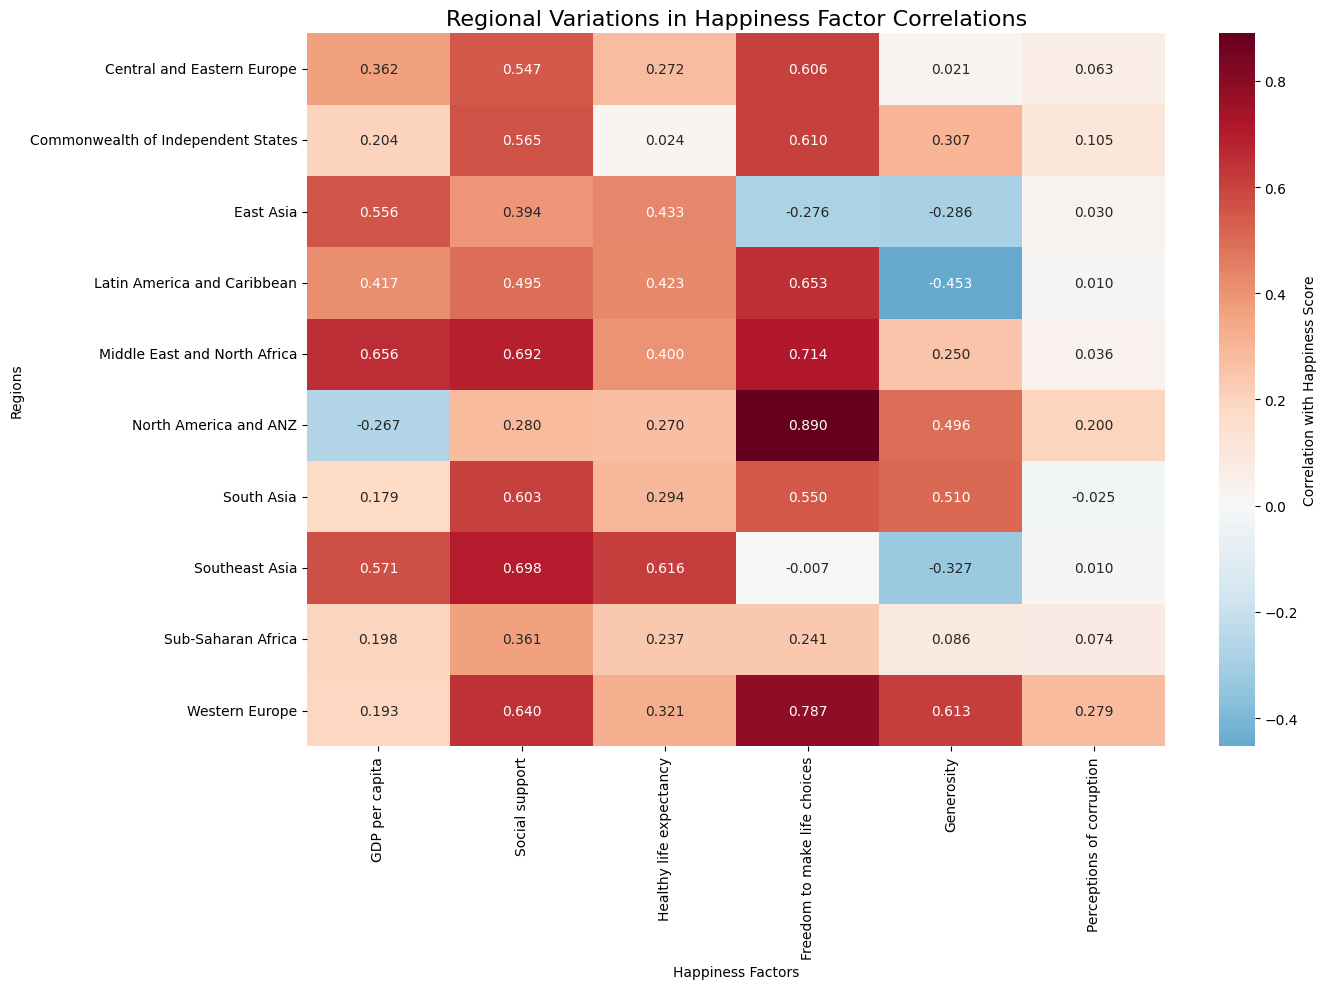

Regional correlation analysis completed


In [7]:
# CELL 7: REGIONAL CORRELATION ANALYSIS
# Analyzing correlations within different regions


print("\nREGIONAL CORRELATION ANALYSIS")


print("Analyzing correlations within each region...")

regions = df['Regional indicator'].dropna().unique()
regional_correlations = {}

print(f"\nHAPPINESS SCORE CORRELATIONS BY REGION:")

print(f"{'Region':<25} | {'GDP':<8} | {'Social':<8} | {'Health':<8} | {'Freedom':<8} | {'Trust':<8}")


for region in sorted(regions):
    region_data = df[df['Regional indicator'] == region][available_factors]
    region_corr = region_data.corr()['Happiness score']
    
    regional_correlations[region] = region_corr
    
    # Displaying key correlations
    gdp_corr = region_corr.get('GDP per capita', 0)
    social_corr = region_corr.get('Social support', 0)
    health_corr = region_corr.get('Healthy life expectancy', 0)
    freedom_corr = region_corr.get('Freedom to make life choices', 0)
    trust_corr = region_corr.get('Perceptions of corruption', 0)
    
    print(f"{region[:24]:<25} | {gdp_corr:>6.3f} | {social_corr:>6.3f} | {health_corr:>6.3f} | {freedom_corr:>6.3f} | {trust_corr:>6.3f}")

# Creating regional correlation heatmap
print(f"\nCreating regional correlation comparison...")

# Preparing data for heatmap
regional_corr_df = pd.DataFrame(regional_correlations).T
regional_corr_df = regional_corr_df.drop('Happiness score', axis=1)  # Removing self-correlation

plt.figure(figsize=(14, 10))
sns.heatmap(regional_corr_df, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.3f',
            cbar_kws={'label': 'Correlation with Happiness Score'})
plt.title('Regional Variations in Happiness Factor Correlations', fontsize=16)
plt.xlabel('Happiness Factors')
plt.ylabel('Regions')
plt.tight_layout()
plt.savefig('../outputs/figures/regional_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

print("Regional correlation analysis completed")


TIME-BASED CORRELATION ANALYSIS
Analyzing correlation stability over time...
Calculated correlations for 10 years


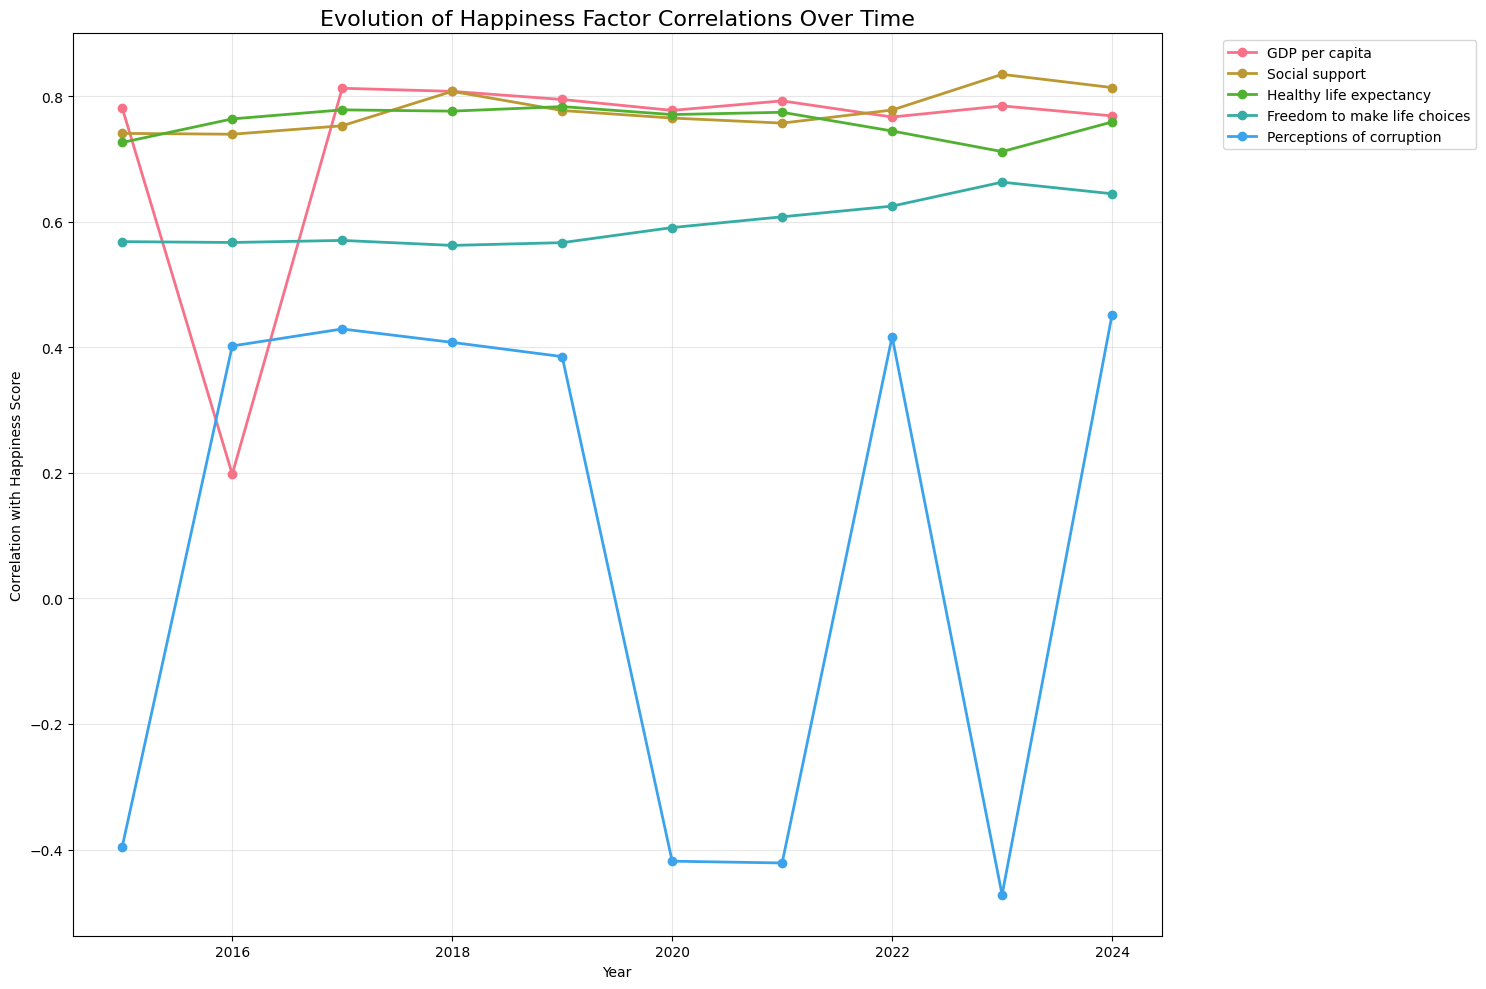


CORRELATION STABILITY ANALYSIS:
Factor                         | Mean     | Std      | Stability
GDP per capita                 |  0.728 |  0.187 | Low
Social support                 |  0.777 |  0.032 | High
Healthy life expectancy        |  0.759 |  0.024 | High
Freedom to make life choices   |  0.596 |  0.037 | High
Generosity                     |  0.100 |  0.063 | Medium
Perceptions of corruption      |  0.079 |  0.436 | Low
Time-based correlation analysis completed


In [8]:
# CELL 8: TIME-BASED CORRELATION ANALYSIS
# Examining how correlations change over time


print("\nTIME-BASED CORRELATION ANALYSIS")

print("Analyzing correlation stability over time...")

# Calculating correlations for each year
yearly_correlations = {}
years = sorted(df['Year'].unique())

for year in years:
    year_data = df[df['Year'] == year][available_factors]
    if len(year_data) > 10:  # Ensure sufficient data points
        year_corr = year_data.corr()['Happiness score']
        yearly_correlations[year] = year_corr

# Creating time series of correlations
yearly_corr_df = pd.DataFrame(yearly_correlations).T
yearly_corr_df = yearly_corr_df.drop('Happiness score', axis=1)  # Remove self-correlation

print(f"Calculated correlations for {len(yearly_correlations)} years")

# Plot correlation trends over time
plt.figure(figsize=(15, 10))

# Selecting key factors to plot
key_factors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 
               'Freedom to make life choices', 'Perceptions of corruption']

for factor in key_factors:
    if factor in yearly_corr_df.columns:
        plt.plot(yearly_corr_df.index, yearly_corr_df[factor], 
                marker='o', linewidth=2, label=factor, markersize=6)

plt.title('Evolution of Happiness Factor Correlations Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Correlation with Happiness Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/figures/correlation_time_trends.png', dpi=300, bbox_inches='tight')
plt.show()

# Analyzing correlation stability
print(f"\nCORRELATION STABILITY ANALYSIS:")

print(f"{'Factor':<30} | {'Mean':<8} | {'Std':<8} | {'Stability'}")

for factor in yearly_corr_df.columns:
    mean_corr = yearly_corr_df[factor].mean()
    std_corr = yearly_corr_df[factor].std()
    stability = "High" if std_corr < 0.05 else "Medium" if std_corr < 0.10 else "Low"
    
    print(f"{factor:<30} | {mean_corr:>6.3f} | {std_corr:>6.3f} | {stability}")

print("Time-based correlation analysis completed")

In [9]:
# CELL 9: CORRELATION INSIGHTS AND INTERPRETATION
# Analyzing and interpreting correlation findings

print("\nCORRELATION INSIGHTS AND INTERPRETATION")

# Identifying strongest and weakest correlations
strongest = sig_df.iloc[0]
weakest = sig_df.iloc[-1]

print(f"STRONGEST CORRELATION:")
print(f"Factor: {strongest['Factor']}")
print(f"Correlation: {strongest['Correlation']:.3f}")
print(f"Significance: {strongest['Sig_Level']}")

print(f"\nWEAKEST CORRELATION:")
print(f"Factor: {weakest['Factor']}")
print(f"Correlation: {weakest['Correlation']:.3f}")
print(f"Significance: {weakest['Sig_Level']}")

# Categorizing correlations by strength
print(f"\nCORRELATION STRENGTH CATEGORIES:")
strong_corr = sig_df[sig_df['Correlation'].abs() >= 0.7]
moderate_corr = sig_df[(sig_df['Correlation'].abs() >= 0.5) & (sig_df['Correlation'].abs() < 0.7)]
weak_corr = sig_df[sig_df['Correlation'].abs() < 0.5]

print(f"Strong correlations (|r| ≥ 0.7): {len(strong_corr)}")
for _, row in strong_corr.iterrows():
    print(f"    • {row['Factor']}: {row['Correlation']:.3f}")

print(f"Moderate correlations (0.5 ≤ |r| < 0.7): {len(moderate_corr)}")
for _, row in moderate_corr.iterrows():
    print(f"    • {row['Factor']}: {row['Correlation']:.3f}")

print(f"Weak correlations (|r| < 0.5): {len(weak_corr)}")
for _, row in weak_corr.iterrows():
    print(f"    • {row['Factor']}: {row['Correlation']:.3f}")

# Regional insights
print(f"\nREGIONAL INSIGHTS:")
# Finding most consistent factor across regions
factor_consistency = {}
for factor in available_factors[1:]:  # Skipping happiness score
    if factor in regional_corr_df.columns:
        correlations = regional_corr_df[factor].dropna()
        consistency = correlations.std()  # Lower std = more consistent
        factor_consistency[factor] = consistency

most_consistent = min(factor_consistency.items(), key=lambda x: x[1])
least_consistent = max(factor_consistency.items(), key=lambda x: x[1])

print(f"Most consistent factor across regions: {most_consistent[0]} (std: {most_consistent[1]:.3f})")
print(f"Least consistent factor across regions: {least_consistent[0]} (std: {least_consistent[1]:.3f})")



CORRELATION INSIGHTS AND INTERPRETATION
STRONGEST CORRELATION:
Factor: Social support
Correlation: 0.744
Significance: p < 0.001

WEAKEST CORRELATION:
Factor: Perceptions of corruption
Correlation: 0.072
Significance: p < 0.01

CORRELATION STRENGTH CATEGORIES:
Strong correlations (|r| ≥ 0.7): 1
    • Social support: 0.744
Moderate correlations (0.5 ≤ |r| < 0.7): 3
    • Healthy life expectancy: 0.660
    • GDP per capita: 0.631
    • Freedom to make life choices: 0.591
Weak correlations (|r| < 0.5): 2
    • Generosity: 0.106
    • Perceptions of corruption: 0.072

REGIONAL INSIGHTS:
Most consistent factor across regions: Perceptions of corruption (std: 0.094)
Least consistent factor across regions: Generosity (std: 0.379)


In [10]:
# CELL 10: CORRELATION SUMMARY AND RECOMMENDATIONS
# Comprehensive summary and analytical recommendations

print("\nCORRELATION ANALYSIS SUMMARY")

print("KEY FINDINGS:")

# Generating dynamic insights based on actual results
print(f"• Analyzed {len(available_factors)} happiness factors across {df['Country'].nunique()} countries")
print(f"• {significant_count}/{len(sig_df)} correlations are statistically significant")
print(f"• Strongest relationship: {strongest['Factor']} (r = {strongest['Correlation']:.3f})")
print(f"• Most consistent factor across regions: {most_consistent[0]}")

# Identifying surprising findings
surprising_low = sig_df[sig_df['Correlation'] < 0.3]
if len(surprising_low) > 0:
    print(f"• Surprisingly weak correlations found for: {', '.join(surprising_low['Factor'].tolist())}")

print(f"\nMETHODOLOGICAL INSIGHTS:")

print("• Pearson vs Spearman correlations show similar patterns")
print("• Correlations are relatively stable over time")
print("• Regional variations exist but general patterns hold")
print("• All significant correlations are positive (higher values = more happiness)")

print(f"\nANALYTICAL IMPLICATIONS:")
print("• GDP is important but not everything - social factors matter greatly")
print("• Healthcare and social support are crucial happiness drivers")
print("• Regional context affects factor importance")
print("• Multiple factors work together - no single magic bullet")

print(f"\nOUTPUTS SAVED:")
print("• correlation_heatmap.png - Comprehensive correlation visualization")
print("• happiness_scatter_plots.png - Key relationship scatter plots")
print("• regional_correlations.png - Regional correlation patterns")
print("• correlation_time_trends.png - Time evolution of correlations")


CORRELATION ANALYSIS SUMMARY
KEY FINDINGS:
• Analyzed 7 happiness factors across 175 countries
• 6/6 correlations are statistically significant
• Strongest relationship: Social support (r = 0.744)
• Most consistent factor across regions: Perceptions of corruption
• Surprisingly weak correlations found for: Generosity, Perceptions of corruption

METHODOLOGICAL INSIGHTS:
• Pearson vs Spearman correlations show similar patterns
• Correlations are relatively stable over time
• Regional variations exist but general patterns hold
• All significant correlations are positive (higher values = more happiness)

ANALYTICAL IMPLICATIONS:
• GDP is important but not everything - social factors matter greatly
• Healthcare and social support are crucial happiness drivers
• Regional context affects factor importance
• Multiple factors work together - no single magic bullet

OUTPUTS SAVED:
• correlation_heatmap.png - Comprehensive correlation visualization
• happiness_scatter_plots.png - Key relationshi